In [2]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [3]:
# open data
df = pd.read_csv('/Users/SnehPandya/Desktop/DeepLearningAGN/data/tau_fulldata_matched.csv',index_col = 0)
df.head()

,ID,RA,DEC,tau,tau_lim_lo,tau_lim_hi,Mass_ground_truth,M_tau,ERR,z
0,70,2.169302,1.238649,1.99550,1.53265,3.72459,7.523331,7.652679,1.523093,1.0730
1,98,1.091028,0.962126,2.27673,2.08917,4.02532,8.817950,8.154875,0.167267,0.7867
2,233,0.331289,0.177230,1.87484,1.62701,3.03110,8.921718,7.437214,0.204242,1.6199
3,1018,1.364696,-0.098956,2.47534,2.32222,4.21751,9.022211,8.509536,0.267495,0.6125
4,1310,0.221552,-0.292485,1.70714,1.28728,3.62220,9.249395,7.137750,0.057662,2.7563


In [4]:
# remove unnecesary columns
df = df.drop(columns = ['ID','z', 'ERR', 'RA','DEC','tau_lim_lo','tau_lim_hi','M_tau'] )
df.head()

,tau,Mass_ground_truth
0,1.99550,7.523331
1,2.27673,8.817950
2,1.87484,8.921718
3,2.47534,9.022211
4,1.70714,9.249395


In [5]:
# convert to numpy array
array = df.to_numpy()
array

array([[ 1.9955    ,  7.52333061],
       [ 2.27673   ,  8.81795034],
       [ 1.87484   ,  8.92171817],
       ..., 
       [ 2.72286   ,  8.45017379],
       [ 2.09733   ,  8.02155865],
       [ 2.99667   ,  8.98848251]])

In [6]:
# isolate attributes and targets
tau_array = array[:,0].reshape(-1,1)
mass_array = array[:,1]
print(tau_array)
print(mass_array)

[[ 1.9955 ]
 [ 2.27673]
 [ 1.87484]
 ..., 
 [ 2.72286]
 [ 2.09733]
 [ 2.99667]]
[ 7.52333061  8.81795034  8.92171817 ...,  8.45017379  8.02155865
  8.98848251]


In [12]:
#split train and test set (X -> tau, y -> mass)
X_train, X_test, y_train, y_test = train_test_split(tau_array, mass_array, test_size=0.2, random_state=0)

In [13]:
#define regression and train it
regressor = LinearRegression()
regressor.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# retrieve line of best fit attributes
print(regressor.intercept_) # y-intercept (b)
print(regressor.coef_) # slope (m)
print(regressor.score(X_test,y_test)) #(r^2 score)

8.77757319193
[ 0.03491042]
0.00229191487823


In [15]:
# apply regression on test set
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
# Y = .0735*X + 8.6749

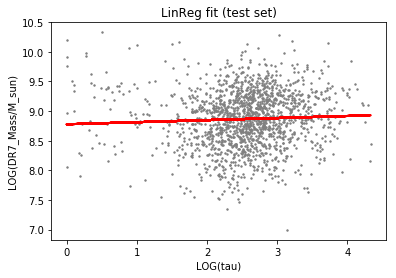

In [16]:
# plotting
plt.scatter(X_test, y_test,  color='gray',s=2)
plt.plot(X_test, y_pred_test, color='red', linewidth=2)
plt.xlabel('LOG(tau)')
plt.ylabel('LOG(DR7_Mass/M_sun)')
plt.title('LinReg fit (test set)')
plt.show()

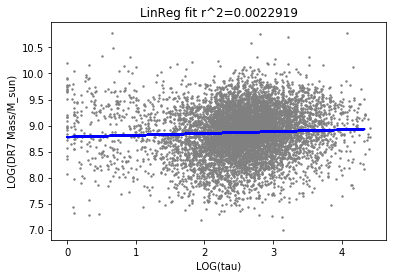

In [17]:
plt.scatter(X_test, y_test,  color='gray',s=2)
plt.scatter(X_train,y_train,color='gray',s=2)
plt.plot(X_test, y_pred_test, color='blue', linewidth=2)
plt.xlabel('LOG(tau)')
plt.ylabel('LOG(DR7 Mass/M_sun)')
plt.title('LinReg fit r^2=' + str(regressor.score(X_test,y_test))[0:9])
plt.show()

In [19]:
# statistics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Root Mean Squared Error: 0.483817804457
